# Six phases of science
1. Discovery
2. Formulate a question, e.g. a testable hypothesis
3. Design an experiment to answer that question, and ideally, many related questions
4. Do the experiment
5. **Analyze the data** (might lead you back to 1)
6. Publish

# Three phases of data analysis (e.g. figure design)
1. **Explore the data**:
    * try to find an answer your question
    * build a model to understand the underlying mechanism
    * test the model using some statistical method
2. Hand-draw a storyboard: create a visual narrative of the story that answers your question
3. Make your final figures based on the story-board (might lead you back to 1 and 2)

# Tutorial: data analysis

In [2]:
import pandas

In [3]:
df = pandas.read_hdf('sample_data.hdf')

In [4]:
df

,time,xpos,ypos,c
0,0.000000,5.013483,8.052425,-0.104275
1,0.020002,4.911594,8.039480,1.059747
2,0.040004,4.811557,8.026244,1.032060
3,0.060006,4.713359,8.012720,1.066620
4,0.080008,4.616989,7.998911,1.065487
...,...,...,...,...
9995,199.919992,7.216561,5.287678,0.995362
9996,199.939994,7.296668,5.260021,1.058570
9997,199.959996,7.377764,5.231980,1.014964
9998,199.979998,7.459855,5.203554,1.007065


# The question:

Is 'c' a function of xpos and ypos?

# Analysis Phase 1: Explore the data - answering the question
Goal: make as many different kinds of plots as quickly as possible. Explore all dimensions of the data, even ones that do not relate directly to the question. 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'ypos')

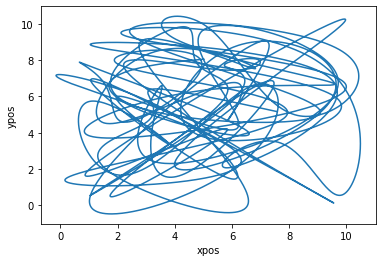

In [6]:
# plt. notation is fast and easy, but not so flexible

plt.plot(df['xpos'], df['ypos'])

plt.xlabel('xpos')
plt.ylabel('ypos')

Text(0, 0.5, 'y pos, m')

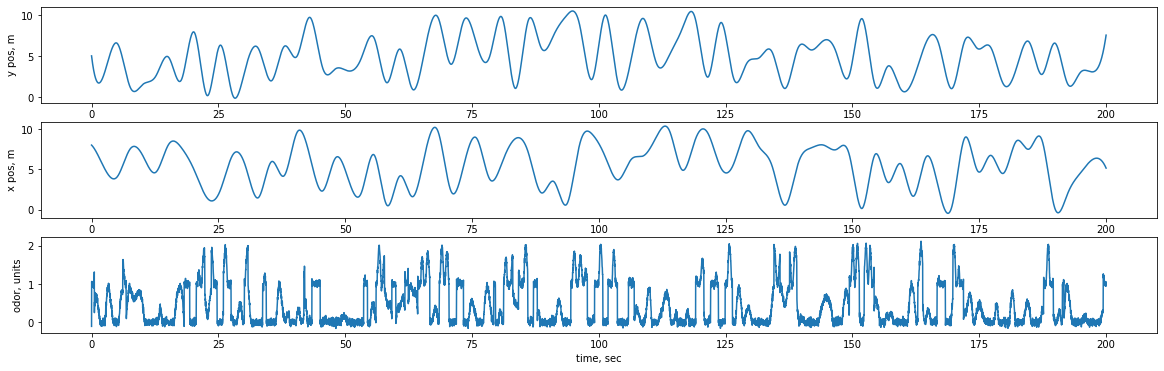

In [7]:
# fig, ax notation is more flexible

fig = plt.figure( figsize=(20,6) )

ax_x = fig.add_subplot(3,1,1)
ax_x.plot(df['time'], df['xpos'])

ax_y = fig.add_subplot(3,1,2)
ax_y.plot(df['time'], df['ypos'])

ax_c = fig.add_subplot(3,1,3)
ax_c.plot(df['time'], df['c'])

# keep formatting stuff seperate
ax_c.set_xlabel('time, sec')
ax_c.set_ylabel('odor, units')
ax_y.set_ylabel('x pos, m')
ax_x.set_ylabel('y pos, m')

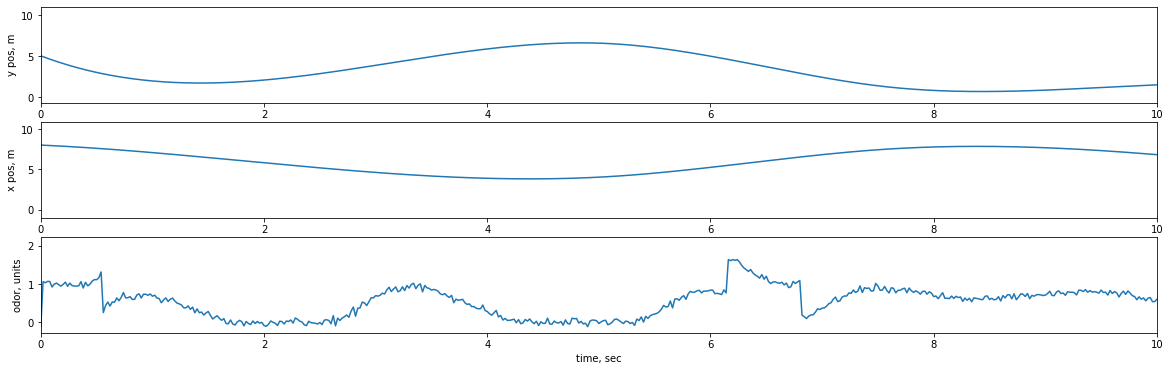

In [8]:
# fig, ax notation is more flexible

fig = plt.figure( figsize=(20,6) )

ax_x = fig.add_subplot(3,1,1)
ax_x.plot(df['time'], df['xpos'])

ax_y = fig.add_subplot(3,1,2)
ax_y.plot(df['time'], df['ypos'])

ax_c = fig.add_subplot(3,1,3)
ax_c.plot(df['time'], df['c'])

# keep formatting stuff seperate
ax_c.set_xlabel('time, sec')
ax_c.set_ylabel('odor, units')
ax_y.set_ylabel('x pos, m')
ax_x.set_ylabel('y pos, m')

# set limits
for ax in [ax_x, ax_y, ax_c]:
    ax.set_xlim(0, 10)

Text(0, 0.5, 'y pos, m')

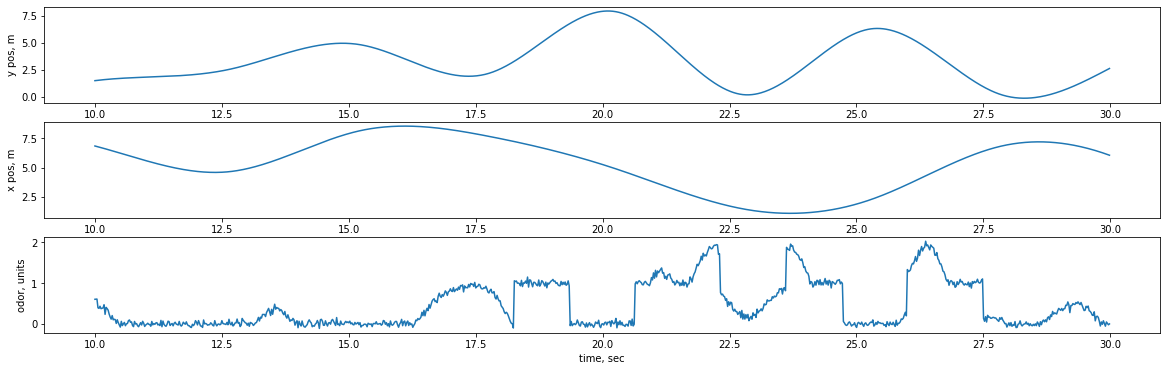

In [9]:
# or subset of data:

query = 'time > 10 and time < 30'
df_tmp = df.query(query)


fig = plt.figure( figsize=(20,6) )

ax_x = fig.add_subplot(3,1,1)
ax_x.plot(df_tmp['time'], df_tmp['xpos'])

ax_y = fig.add_subplot(3,1,2)
ax_y.plot(df_tmp['time'], df_tmp['ypos'])

ax_c = fig.add_subplot(3,1,3)
ax_c.plot(df_tmp['time'], df_tmp['c'])

# keep formatting stuff seperate
ax_c.set_xlabel('time, sec')
ax_c.set_ylabel('odor, units')
ax_y.set_ylabel('x pos, m')
ax_x.set_ylabel('y pos, m')

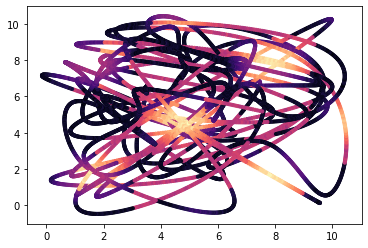

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df['xpos'], df['ypos'], c=df['c'], s=10, cmap='magma')

In [11]:
# For a true line: 
# https://github.com/florisvb/FlyPlotLib/blob/master/fly_plot_lib/plot.py

# plot a line in x and y with changing colors defined by z
# optionally changing linewidths defined by linewidth
from matplotlib.collections import LineCollection
def colorline(ax, x,y,z,linewidth=1, colormap='jet', norm=None, zorder=1, alpha=1, 
              linestyle='solid', cmap=None, hide_nan_indices=True, hack_round_caps=False, 
              axis_size_inches=None, cap_size_radius_adjustment=2):
        '''
        hack_round_caps - extend line segments so that line appears continuous. beta mode.
        axis_size_inches - used for hack_projected_cap (x,y). Not well implemented.
        '''
        if cmap is None:
            cmap = plt.get_cmap(colormap)
        
        if type(linewidth) is list or type(linewidth) is np.array or type(linewidth) is np.ndarray:
            linewidths = linewidth
        else:
            linewidths = np.ones_like(z)*linewidth
        
        if norm is None:
            norm = plt.Normalize(np.min(z), np.max(z))
        else:
            norm = plt.Normalize(norm[0], norm[1])
        
        '''
        if self.hide_colorbar is False:
            if self.cb is None:
                self.cb = matplotlib.colorbar.ColorbarBase(self.ax1, cmap=cmap, norm=norm, orientation='vertical', boundaries=None)
        '''
        
        # Create a set of line segments so that we can color them individually
        # This creates the points as a N x 1 x 2 array so that we can stack points
        # together easily to get the segments. The segments array for line collection
        # needs to be numlines x points per line x 2 (x and y)
        points = np.array([x, y]).T.reshape(-1, 1, 2).astype(float)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        if hide_nan_indices == True:
            nanindices_x = np.where(np.isnan(x))[0].tolist()
            nanindices_y = np.where(np.isnan(y))[0].tolist()
            nanindices_x.extend(nanindices_y)
            nanindices = np.unique(nanindices_x)
            segments = np.delete(segments, nanindices, axis=0)
            z = np.delete(z, nanindices, axis=0)
            
        # Create the line collection object, setting the colormapping parameters.
        # Have to set the actual values used for colormapping separately.
        ordered_zorder = (zorder-1) #+ z/float(len(z))
        if hasattr(linewidth, '__iter__'):
            lc = LineCollection(segments, linewidths=linewidths, cmap=cmap, norm=norm, zorder=zorder, alpha=alpha, linestyles=linestyle )
            lc.set_array(z)
            lc.set_zorder( ordered_zorder)#.tolist()
            lc.set_linewidth(linewidth)
        else:
            lc = LineCollection(segments, linewidths=linewidth, cmap=cmap, norm=norm, zorder=zorder, alpha=alpha, linestyles=linestyle )
            lc.set_array(z)
            lc.set_zorder(ordered_zorder)#.tolist()
        ax.add_collection(lc)
        
        if hack_round_caps:
            ax.scatter(x,y,color=cmap(norm(z)),s=linewidth**2,edgecolor='none',zorder=(z-10).tolist())

<ipython-input-11-7afbd03d41a1>:45: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  segments = np.delete(segments, nanindices, axis=0)
<ipython-input-11-7afbd03d41a1>:46: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  z = np.delete(z, nanindices, axis=0)


(0.0, 10.0)

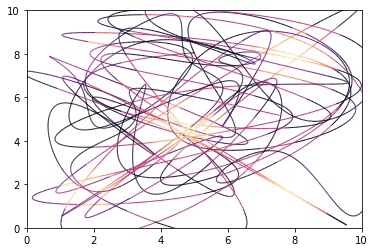

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

colorline(ax, df['xpos'], df['ypos'], df['c'], colormap='magma')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

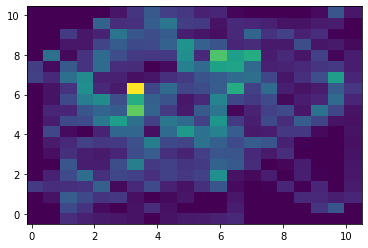

In [13]:
# residency

r = plt.hist2d(df['xpos'], df['ypos'], bins=20) 

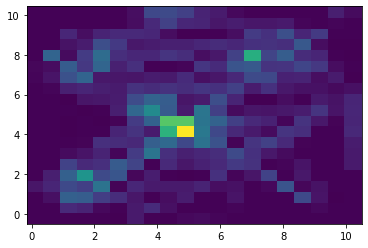

In [14]:
# residency weighted by 'c'
r = plt.hist2d(df['xpos'], df['ypos'], bins=20, weights=df['c']) 

# Phase 1: Explore the data - digging in, building a model

The answer to the question seems to be "yes": there is a pattern. But we have more work to do. 

1. What is the relationship between x, y, and c? Can we build a model that describes the pattern?
2. Can we explain the portions of the data that break the obvious pattern?
3. We need to do some kind of statistical test to show that our model is not due to chance.

<ipython-input-11-7afbd03d41a1>:45: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  segments = np.delete(segments, nanindices, axis=0)
<ipython-input-11-7afbd03d41a1>:46: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  z = np.delete(z, nanindices, axis=0)


Text(0, 0.5, 'x pos')

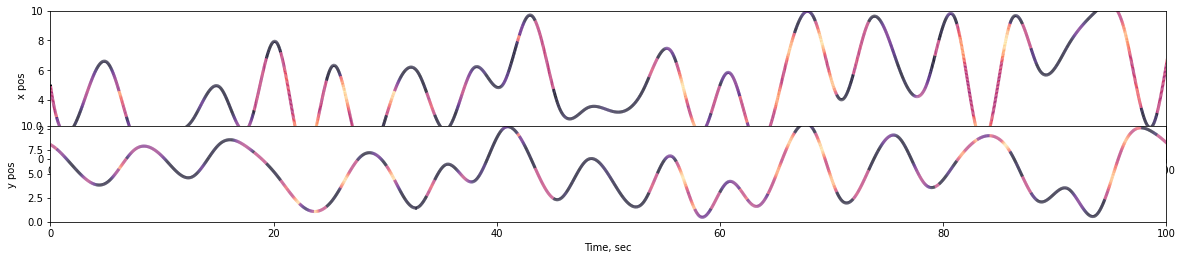

In [15]:
fig = plt.figure( figsize=(20,6) )

ax_x = fig.add_subplot(2,1,1)
colorline(ax_x, df['time'], df['xpos'], df['c'], colormap='magma', linewidth=3)
ax_x.set_xlim(0, 100)
ax_x.set_ylim(0, 10)

ax_y = fig.add_subplot(3,1,2)
colorline(ax_y, df['time'], df['ypos'], df['c'], colormap='magma', linewidth=3)
ax_y.set_xlim(0, 100)
ax_y.set_ylim(0, 10)

ax_y.set_xlabel('Time, sec')
ax_y.set_ylabel('y pos')
ax_x.set_ylabel('x pos')

Text(0.5, 0, 'ypos')

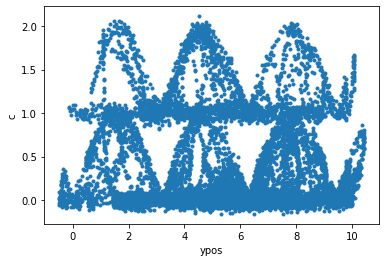

In [16]:
plt.plot(df['ypos'], df['c'], '.')

plt.ylabel('c')
plt.xlabel('ypos')

Text(0.5, 0, 'xpos')

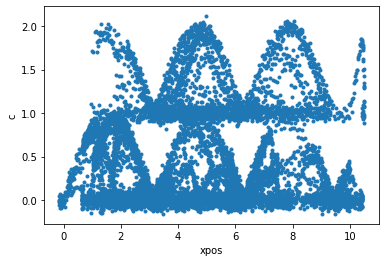

In [17]:
plt.plot(df['xpos'], df['c'], '.')

plt.ylabel('c')
plt.xlabel('xpos')

### Hypothesis: c is related to sin(x), and sin(y)

Text(0.5, 0, 'xpos')

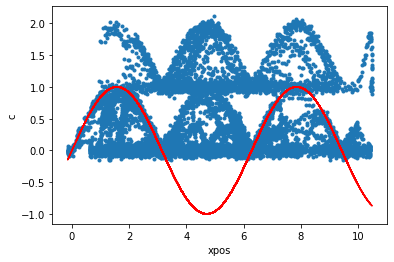

In [18]:
plt.plot(df['xpos'], df['c'], '.')
plt.plot(df['xpos'], np.sin(df['xpos']), color='red')

plt.ylabel('c')
plt.xlabel('xpos')

Text(0.5, 0, 'xpos')

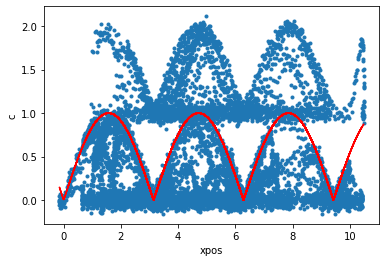

In [19]:
plt.plot(df['xpos'], df['c'], '.')
plt.plot(df['xpos'], np.abs( np.sin(df['xpos']) ), color='red')

plt.ylabel('c')
plt.xlabel('xpos')

### Hypothesis A: c is related to abs( sin(x) + sin(y) )
### Hypothesis B: c is related to abs( sin(x)*sin(y) )

In [20]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)

In [21]:
X, Y = np.meshgrid(x, y)

<ipython-input-22-b8e23023b804>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, C, cmap='magma')


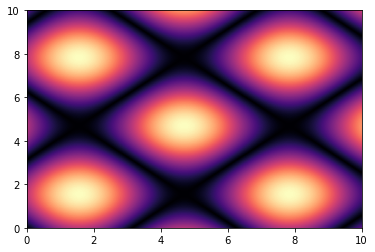

In [22]:
C = np.abs( np.sin(X) + np.sin(Y) )
plt.pcolormesh(X, Y, C, cmap='magma')

### Test H1

<ipython-input-23-1beef688d8b7>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X, Y, C, cmap='magma')


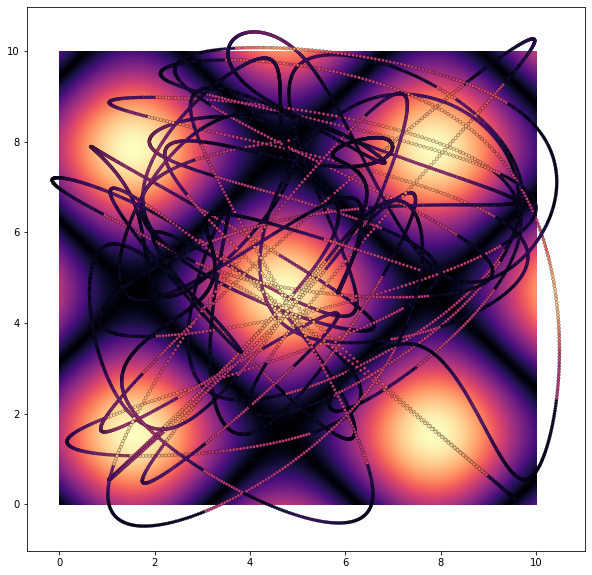

In [23]:
fig = plt.figure( figsize=(10,10) )
ax = fig.add_subplot(111)

C = np.abs( np.sin(X) + np.sin(Y) )
ax.pcolormesh(X, Y, C, cmap='magma')

ax.scatter(df['xpos'], df['ypos'], c=df['c'], s=10, cmap='magma', 
           edgecolors='black',
           linewidth=0.25)

### Test H2

<ipython-input-24-e44513e5b88b>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X, Y, C, cmap='magma')


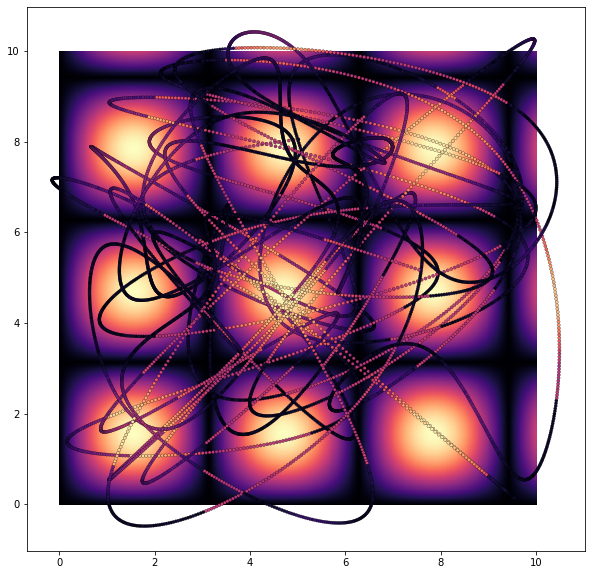

In [24]:
fig = plt.figure( figsize=(10,10) )
ax = fig.add_subplot(111)

C = np.abs( np.sin(X) * np.sin(Y) )
ax.pcolormesh(X, Y, C, cmap='magma')

ax.scatter(df['xpos'], df['ypos'], c=df['c'], s=10, cmap='magma', 
           edgecolors='black',
           linewidth=0.25)

### Hypothesis 3: c is related to sin(x)*sin(y) if sin(x)*sin(y) > 0

<ipython-input-25-71b0ae1baa5a>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X, Y, C, cmap='magma')


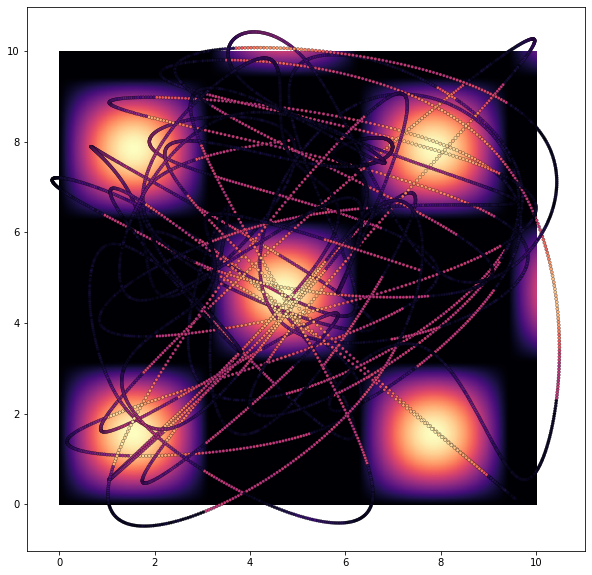

In [25]:
fig = plt.figure( figsize=(10,10) )
ax = fig.add_subplot(111)

C = np.sin(X) * np.sin(Y)
C[C<0] = 0

ax.pcolormesh(X, Y, C, cmap='magma')

ax.scatter(df['xpos'], df['ypos'], c=df['c'], s=10, cmap='magma', 
           edgecolors='black',
           linewidth=0.25)

### Which model is best?

In [26]:
model_a = np.abs( np.sin(df['xpos']) + np.sin(df['ypos']) )
df['model_a'] = model_a

model_b = np.abs( np.sin(df['xpos'])*np.sin(df['ypos']) )
df['model_b'] = model_b

model_c = np.sin(df['xpos'])*np.sin(df['ypos'])
model_c[model_c<0] = 0
df['model_c'] = model_c

In [27]:
# root mean square error: a decent simple metric
def RMSE(data, model):
    return np.sqrt( np.mean( (data - model)**2 ) )

In [28]:
print('Model A: ', RMSE(df['c'], df['model_a']))
print('Model B: ', RMSE(df['c'], df['model_b']))
print('Model C: ', RMSE(df['c'], df['model_c']))

Model A:  0.6552292499163832
Model B:  0.5366702879600593
Model C:  0.5051422744637504


### so far, model C seems best, but still lots of errors... can we explain them?

In [29]:
df['error_c'] = np.abs(df['c'] - df['model_c'])

### Decent fit.. now let's look at the errors... can we explain them?

(array([5.587e+03, 1.717e+03, 1.560e+02, 7.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+01, 1.970e+02, 9.050e+02, 9.920e+02,
        3.800e+02, 3.800e+01]),
 array([3.11796285e-06, 5.82858692e-02, 1.16568620e-01, 1.74851372e-01,
        2.33134123e-01, 2.91416874e-01, 3.49699625e-01, 4.07982376e-01,
        4.66265128e-01, 5.24547879e-01, 5.82830630e-01, 6.41113381e-01,
        6.99396132e-01, 7.57678884e-01, 8.15961635e-01, 8.74244386e-01,
        9.32527137e-01, 9.90809888e-01, 1.04909264e+00, 1.10737539e+00,
        1.16565814e+00]),
 <BarContainer object of 20 artists>)

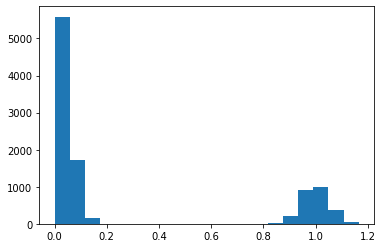

In [30]:
plt.hist(df['error_c'], bins=20)

In [31]:
# https://github.com/florisvb/FlyPlotLib/blob/master/fly_plot_lib/flymath.py
def get_continuous_chunks(array, array2=None, jump=1, return_index=False):
    """
    Splits array into a list of continuous chunks. Eg. [1,2,3,4,5,7,8,9] becomes [[1,2,3,4,5], [7,8,9]]
    
    array2  -- optional second array to split in the same way array is split
    jump    -- specifies size of jump in data to create a break point
    """
    diffarray = np.diff(array)
    diffarray = np.hstack( (diffarray[0], diffarray) )
    break_points = np.where(np.abs(diffarray) > jump)[0]
    break_points = np.insert(break_points, 0, 0)
    break_points = np.insert(break_points, len(break_points), len(array))
    
    chunks = []
    array2_chunks = []
    index = []
    for i, break_point in enumerate(break_points):
        if break_point >= len(array):
            break
        chunk = array[break_point:break_points[i+1]]
        if type(chunk) is not list:
            chunk = chunk.tolist()
        chunks.append(chunk)
        
        if array2 is not None:
            array2_chunk = array2[break_point:break_points[i+1]]
            if type(array2_chunk) is not list:
                array2_chunk = array2_chunk.tolist()
            array2_chunks.append(array2_chunk)
        
        if return_index:
            indices_for_chunk = np.arange(break_point,break_points[i+1])
            index.append(indices_for_chunk)
            
    if type(break_points) is not list:
        break_points = break_points.tolist()
        
    if return_index:
        return index
    
    if array2 is None:
        return chunks, break_points
    
    else:
        return chunks, array2_chunks, break_points

In [32]:
where_error_big = np.where( df['error_c'] > 0.5 )[0]
chunks, b = get_continuous_chunks(where_error_big, jump=1)

In [33]:
df['time'].values[chunks[0]]

array([0.020002  , 0.040004  , 0.060006  , 0.080008  , 0.10001   ,
       0.120012  , 0.140014  , 0.160016  , 0.180018  , 0.20002   ,
       0.220022  , 0.240024  , 0.260026  , 0.280028  , 0.30003   ,
       0.320032  , 0.340034  , 0.360036  , 0.380038  , 0.40004   ,
       0.420042  , 0.440044  , 0.460046  , 0.480048  , 0.50005001,
       0.52005201, 0.54005401])

Text(26.700000000000017, 0.5, 'y pos, m')

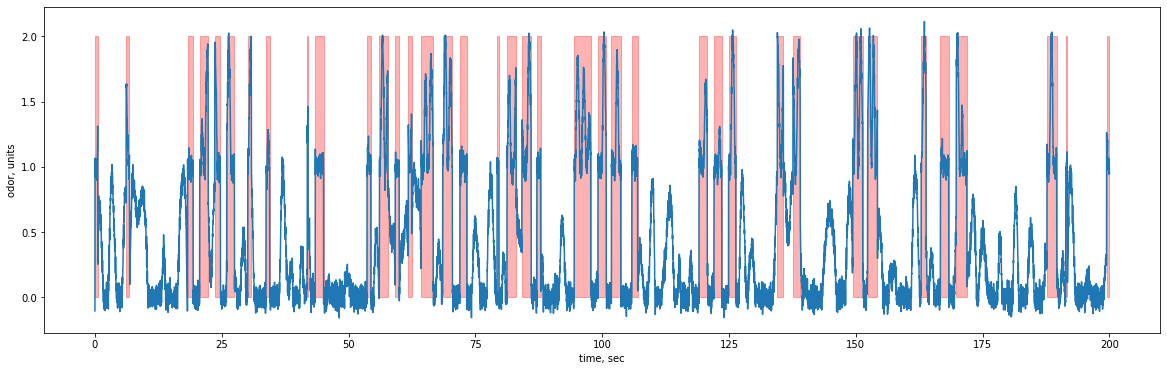

In [34]:
fig = plt.figure( figsize=(20,6) )

ax_c = fig.add_subplot(1,1,1)
ax_c.plot(df['time'], df['c'])

for chunk in chunks:
    ax_c.fill_between(df['time'].values[chunk], 0, 2, color='red', alpha=0.3)

# keep formatting stuff seperate
ax_c.set_xlabel('time, sec')
ax_c.set_ylabel('odor, units')
ax_y.set_ylabel('x pos, m')
ax_x.set_ylabel('y pos, m')

Text(0, 0.5, 'y pos, m')

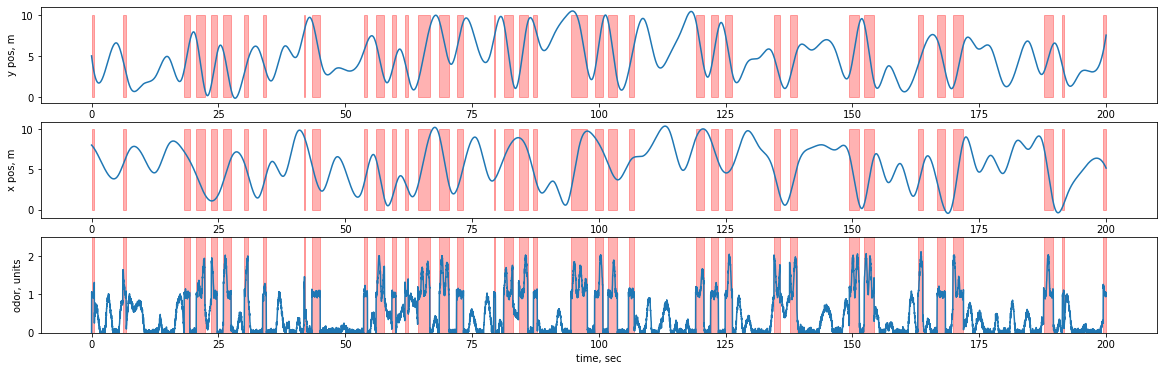

In [35]:
fig = plt.figure( figsize=(20,6) )

ax_x = fig.add_subplot(3,1,1)
ax_x.plot(df['time'], df['xpos'])

ax_y = fig.add_subplot(3,1,2)
ax_y.plot(df['time'], df['ypos'])

ax_c = fig.add_subplot(3,1,3)
ax_c.plot(df['time'], df['c'])

for ax in [ax_x, ax_y, ax_c]:
    for chunk in chunks:
        ax.fill_between(df['time'].values[chunk], 0, 10, color='red', alpha=0.3)

ax_c.set_ylim(0, 2.5)
        
# keep formatting stuff seperate
ax_c.set_xlabel('time, sec')
ax_c.set_ylabel('odor, units')
ax_y.set_ylabel('x pos, m')
ax_x.set_ylabel('y pos, m')

### Hypothesis: perhaps error is related to the speed of the trajectory?

In [36]:
dt = np.mean( np.diff(df['time']))
xvel = np.hstack([0, np.diff(df['xpos'])]) / dt # very bad way to calculate a derivative of real data
yvel = np.hstack([0, np.diff(df['ypos'])]) / dt # very bad way to calculate a derivative of real data

In [37]:
speed = np.sqrt( xvel**2 + yvel**2 )
df['speed'] = speed

Text(0, 0.5, 'Speed')

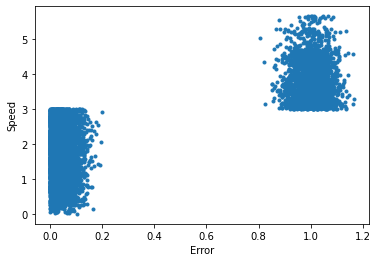

In [41]:
plt.plot(df['error_c'], df['speed'], '.')
plt.xlabel('Error')
plt.ylabel('Speed')

In [44]:
df['model_d'] = (df['speed'] > 3).astype(int)

### Now let's see the errors if we use model_c + model_d

In [45]:
print('Model A: ', RMSE(df['c'], df['model_c'] + df['model_d']))

Model A:  0.050728583481956725


### Much better!

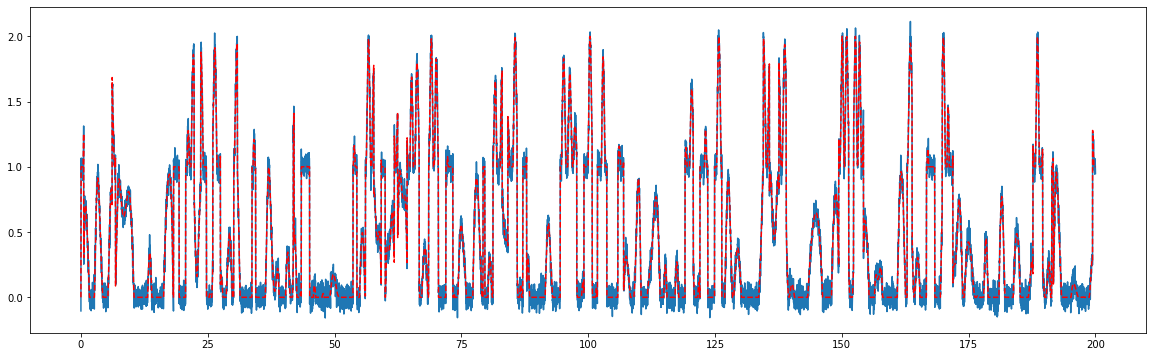

In [48]:
fig = plt.figure( figsize=(20,6))
ax = fig.add_subplot(111)

ax.plot(df['time'], df['c'])
ax.plot(df['time'], df['model_c'] + df['model_d'], '--', color='red')

# Statistics? 

In my opinion, for the kind of data you will be collecting, almost always by the time you run a statistical test, you should already be very much convinced that what you're seeing is real. The stats are just to make reviewers happy. 

A few general approaches:

1. Comparing two populations to see if they are likely to come from the same distribution
2. Comparing two distributions to see if they are the same
3. Linear regressions / model testing
4. Boostratpped methods

### In this case the linear regression / model testing approach is fine

In [57]:
# https://www.statsmodels.org/stable/index.html

In [58]:
import statsmodels.formula.api as smf

In [59]:
results = smf.ols('c ~ model_c + model_d', data=df).fit()

In [60]:
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.991      
Dependent Variable: c                AIC:                -31245.9903
Date:               2020-08-27 15:10 BIC:                -31224.3593
No. Observations:   10000            Log-Likelihood:     15626.     
Df Model:           2                F-statistic:        5.696e+05  
Df Residuals:       9997             Prob (F-statistic): 0.00       
R-squared:          0.991            Scale:              0.0025728  
----------------------------------------------------------------------
              Coef.    Std.Err.      t       P>|t|     [0.025   0.975]
----------------------------------------------------------------------
Intercept     0.0011     0.0007     1.6266   0.1039   -0.0002   0.0024
model_c       0.9971     0.0018   560.1447   0.0000    0.9936   1.0006
model_d       0.9982     0.0012   852.1589   0.0000    0.9959   1.0005
-----------------------------------------

### What did we learn? 

We can explain 99.1% of the variance of c, using a linear combination of model_c and model_d. The p-value is so small, that it doesn't even register. Model_c and model_d contribute equally, both have coefficients of 1.

AIC and BIC are very small.. this is an indication that the model is good.

I don't know what all the other things mean.

### What if we tried another option?

In [68]:
results = smf.ols('c ~ model_a + model_d', data=df).fit()
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.942      
Dependent Variable: c                AIC:                -12238.6043
Date:               2020-08-27 15:13 BIC:                -12216.9733
No. Observations:   10000            Log-Likelihood:     6122.3     
Df Model:           2                F-statistic:        8.088e+04  
Df Residuals:       9997             Prob (F-statistic): 0.00       
R-squared:          0.942            Scale:              0.017214   
----------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
Intercept   -0.1683     0.0024   -70.3903   0.0000   -0.1730   -0.1636
model_a      0.4475     0.0023   195.9374   0.0000    0.4430    0.4519
model_d      1.0116     0.0030   334.2075   0.0000    1.0056    1.0175
-----------------------------------------

### This model is also "good".. 

But looking at the actual data is what led us to realize that this is not the CORRECT model! Hence, statistical tests are really limited in what they can actually tell you.

Visualizing the data is key.

Side note: Comparing the R^2, and AIC / BIC, gives you a statistical reference to say why model_c + model_d was better.